### İmporting the libaries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv('world_bank_dataset.csv')
dataset.head(20)

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
5,United Kingdom,2015,1.071180e+13,7.225600e+08,74.6,23.24,7.55,64.48
6,China,2016,6.791480e+12,1.492810e+09,84.6,15.59,10.18,78.46
7,Indonesia,2017,9.467220e+12,1.182400e+08,80.9,10.91,2.87,61.41
8,United Kingdom,2018,1.351403e+13,1.461580e+09,57.0,3.29,9.29,98.05
9,India,2019,1.425720e+13,8.020500e+08,59.9,18.61,19.10,92.80


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


In [7]:
dataset.isnull().sum()

Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64

In [11]:
dataset['Country'].nunique()

20

In [12]:
average_data = dataset.groupby('Country')[['GDP (USD)', 'Unemployment Rate (%)']].mean().reset_index()

fig = plt.scatter(
    average_data,
    x='Unemployment Rate (%)',
    y='GDP (USD)',
    text='Country',
    title='Average GDP vs. Average Unemployment Rate by Country',
    labels={'Unemployment Rate (%)': 'Average Unemployment Rate', 'GDP (USD)': 'Average GDP (USD)'},
    hover_name='Country',
)
fig.show()

TypeError: scatter() got multiple values for argument 'x'

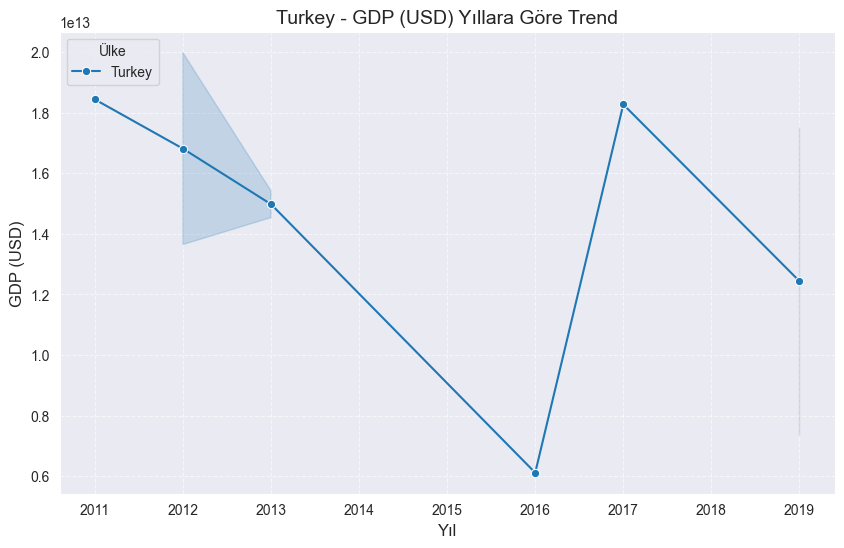

In [19]:
country = "Turkey"
country_data = dataset[dataset['Country'] == country]


plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP (USD)', data=country_data, marker='o', label=country)


plt.title(f'{country} - GDP (USD) Trend by Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country ", loc='upper left')
plt.show()

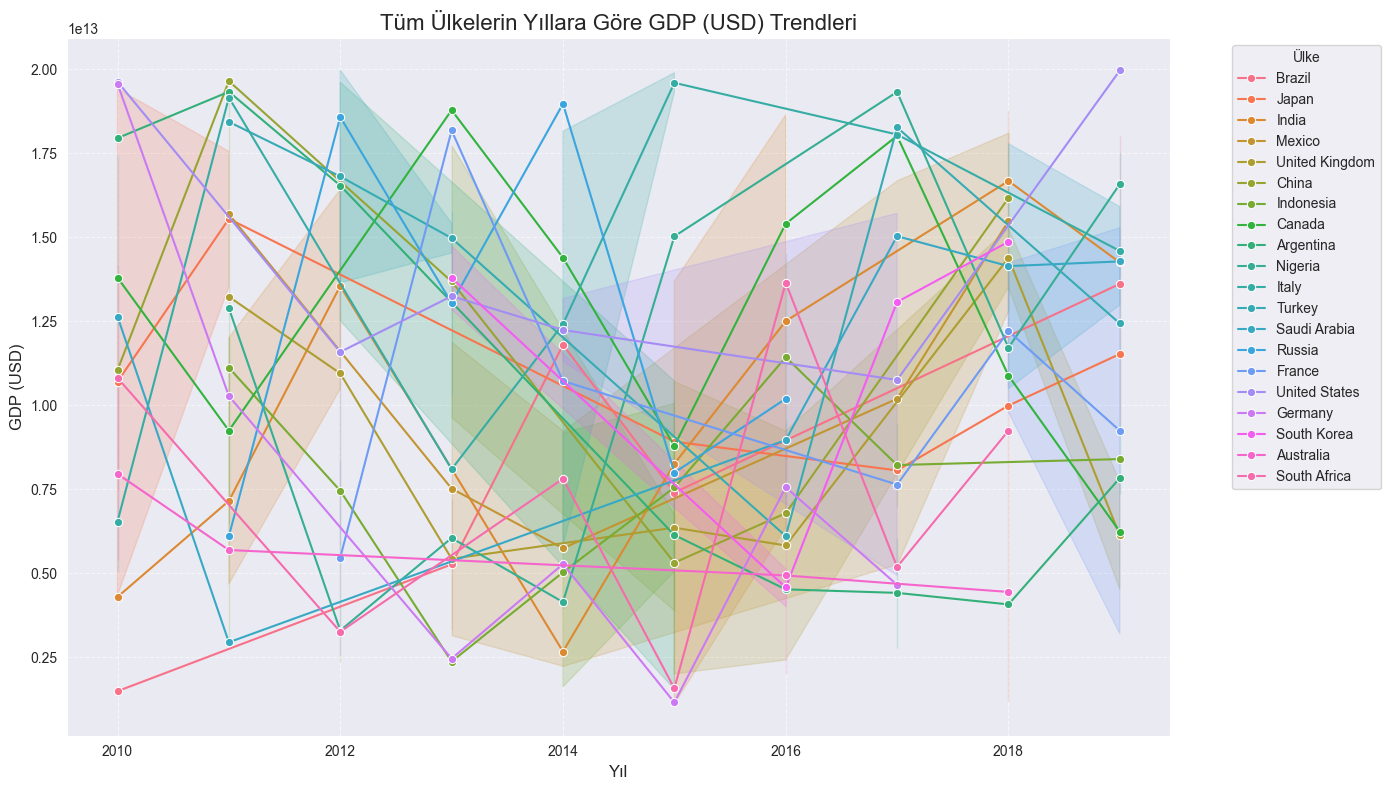

In [18]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='GDP (USD)', hue='Country', data=dataset, marker='o')


plt.title('‘GDP (USD) Trends of All Countries by Year’', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

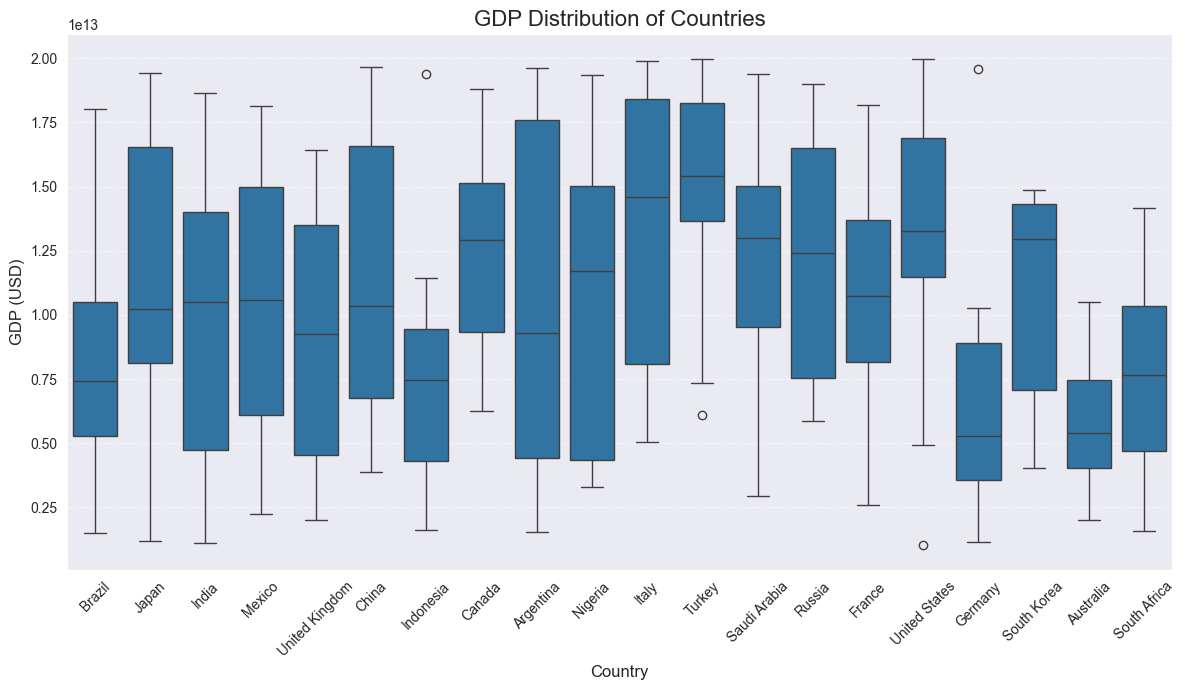

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Country', y='GDP (USD)', data=dataset)

# Grafik detayları
plt.title('GDP Distribution of Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


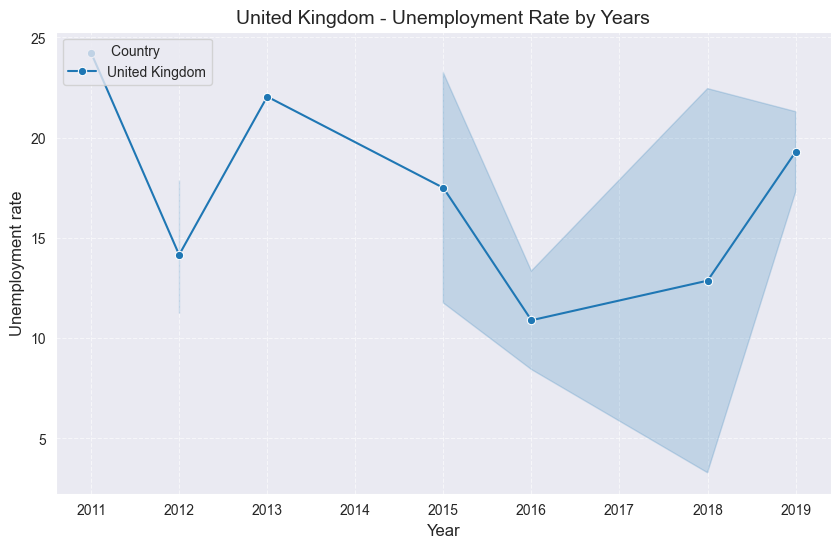

In [26]:
country = "United Kingdom"
country_data = dataset[dataset['Country'] == country]


plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Unemployment Rate (%)', data=country_data, marker='o', label=country)


plt.title(f'{country} - Unemployment Rate by Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country ", loc='upper left')
plt.show()

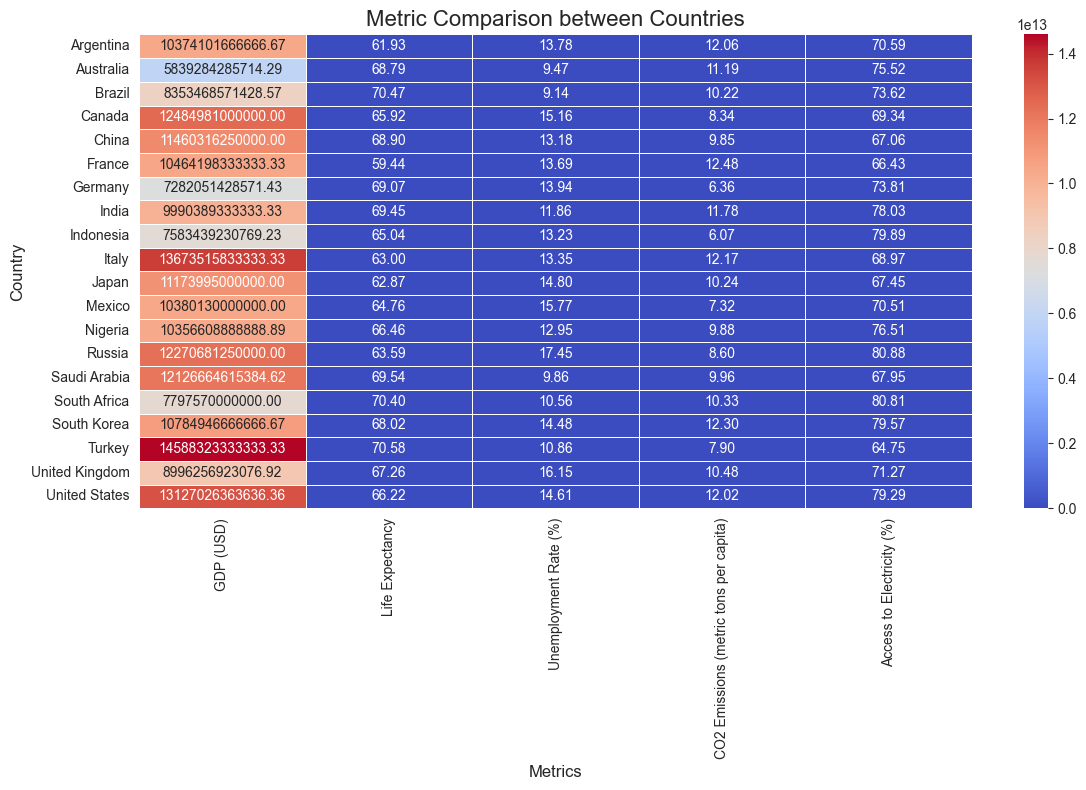

In [30]:

comparison_metrics = dataset.groupby('Country')[['GDP (USD)', 'Life Expectancy', 'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)']].mean()


plt.figure(figsize=(12, 8))
sns.heatmap(comparison_metrics, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)


plt.title('Metric Comparison between Countries', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


### Machine Learning

In [33]:
X = dataset.iloc[:, [1, 3, 4, 5, 6, 7]] 
y = dataset.iloc[:, 2]  

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita)
0,2010,1.493220e+12,829020000.0,66.7,3.81,10.79
1,2011,1.756270e+13,897010000.0,61.4,17.98,15.67
2,2012,1.642688e+13,669850000.0,69.1,16.02,2.08
3,2013,1.189001e+13,113800000.0,80.1,6.26,19.13
4,2014,2.673020e+12,29710000.0,62.7,3.10,15.66
